In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Plotting Spam vs Real ROC

##### InceptionV3 Tuned

In [2]:
actual = np.load('InceptionV3/RealSpam/actual_spamreal.npy')
pred = np.load('InceptionV3/RealSpam/pred_spamreal.npy')

In [3]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_inception3T, tpr_inception3T, _ = roc_curve(actual, pred)
print(roc_auc_score(actual, pred))

0.9842551839046143


##### InceptionV3

In [4]:
fpr_inception3 = np.load('InceptionV3/fpr_InceptionV3_RealSpam.npy')
tpr_inception3 = np.load('InceptionV3/tpr_InceptionV3_RealSpam.npy')

##### VGGNet

In [5]:
fpr_vgg = np.load('VGGNet/fpr_VGGNet_RealSpam.npy')
tpr_vgg = np.load('VGGNet/tpr_VGGNet_RealSpam.npy')

##### ResNet

In [6]:
fpr_res = np.load('ResNet/fpr_ResNet_RealSpam.npy')
tpr_res = np.load('ResNet/tpr_ResNet_RealSpam.npy')

In [7]:
def plot_roc(fpr, tpr, title, color='darkorange', saveas=None, hold=True, linestyle='-'):
    lw = 2
    plt.plot(fpr, tpr, label = title, linestyle = linestyle,
             lw=lw)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=20)
    plt.ylabel('True Positive Rate', fontsize=20)


##### Plotting ROC Curves

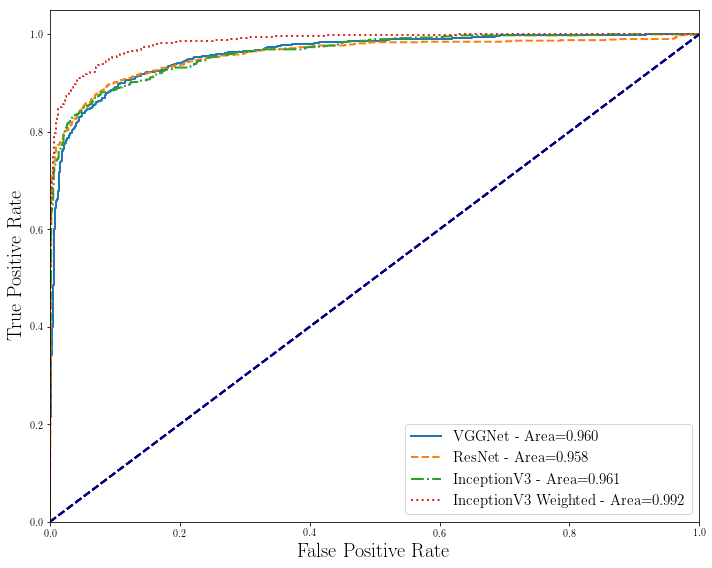

In [8]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(10,8))
plot_roc(fpr_vgg, tpr_vgg, linestyle = '-',
         title='VGGNet - Area=0.960')
plot_roc(fpr_res, tpr_res, linestyle = '--',
         title='ResNet - Area=0.958')
plot_roc(fpr_inception3, tpr_inception3, linestyle = '-.',
         title='InceptionV3 - Area=0.961')
plot_roc(fpr_inception3T, tpr_inception3T, linestyle = ':',
         title='InceptionV3 Weighted - Area=0.992')

plt.legend(fontsize=15)
# plt.title('Receiver operating characteristic for Image Classifers', fontsize=20)
plt.tight_layout()
plt.savefig('ImageROC.eps')
plt.savefig('ImageROC.jpeg', dpi=200)
plt.show()


In [21]:
pd.DataFrame(dict(fpr=fpr_res, tpr=tpr_res)).to_csv('resnet.csv', index=False)
pd.DataFrame(dict(fpr=fpr_vgg, tpr=tpr_vgg)).to_csv('vggnet.csv', index=False)
pd.DataFrame(dict(fpr=fpr_inception3, tpr=tpr_inception3)).to_csv('inception3net.csv', index=False)
pd.DataFrame(dict(fpr=fpr_inception3T, tpr=tpr_inception3T)).to_csv('inception3Tnet.csv', index=False)